In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df = pd.read_csv("movies.csv")
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['title','release_date'], inplace=True)
df = df[df.vote_count >= 40].reset_index()

In [3]:
df.shape

(28214, 21)

In [4]:
df.isnull().sum().sort_values(ascending = False)

tagline                 10963
keywords                 4646
recommendations          3934
production_companies     1189
backdrop_path             589
credits                   199
overview                  167
genres                     36
poster_path                24
runtime                     2
vote_count                  0
vote_average                0
index                       0
status                      0
id                          0
budget                      0
release_date                0
popularity                  0
original_language           0
title                       0
revenue                     0
dtype: int64

In [5]:
df = df.dropna(subset=['title', 'release_date'])

In [6]:
df.isnull().sum().sort_values(ascending = False)

tagline                 10963
keywords                 4646
recommendations          3934
production_companies     1189
backdrop_path             589
credits                   199
overview                  167
genres                     36
poster_path                24
runtime                     2
vote_count                  0
vote_average                0
index                       0
status                      0
id                          0
budget                      0
release_date                0
popularity                  0
original_language           0
title                       0
revenue                     0
dtype: int64

In [7]:
df.shape

(28214, 21)

<AxesSubplot:ylabel='genres'>

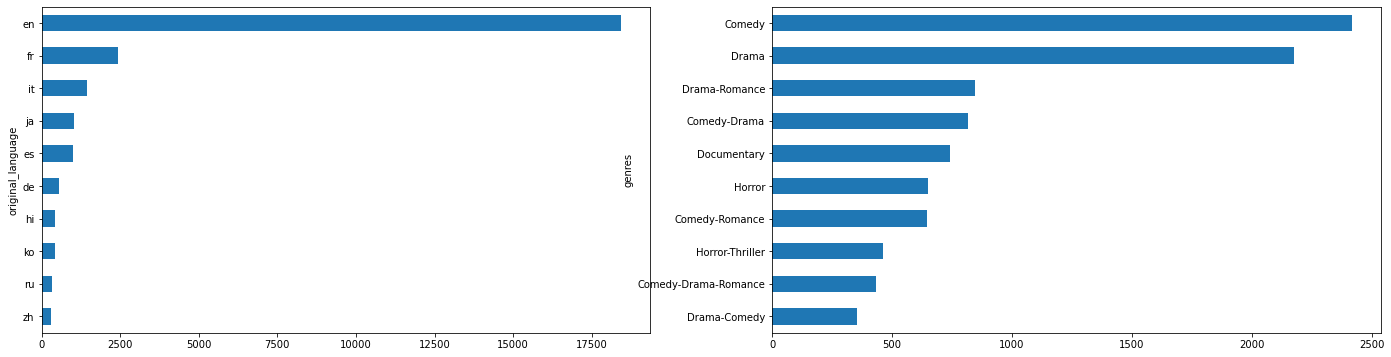

In [8]:
plt.figure(figsize = ((24, 6)))
plt.subplot(1, 2, 1)
df.groupby('original_language')['title'].count().sort_values(ascending = True).tail(10).plot.barh("Linguas")
plt.subplot(1, 2, 2)
df.groupby('genres')['title'].count().sort_values(ascending = True).tail(10).plot.barh("Gêneros")

In [9]:
df['data'] = pd.to_datetime(df['release_date']).dt.date
df

,index,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,data
0,0,436270,Black Adam,Action-Fantasy-Adventure,en,Nearly 5000 years after he was bestowed with t...,5132.631,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,...,Released,The world needed a hero. It got Black Adam.,7.326,298.0,Dwayne Johnson-Aldis Hodge-Pierce Brosnan-Quin...,anti hero-superhero-based on comic-dc extended...,/3zXceNTtyj5FLjwQXuPvLYK5YYL.jpg,/bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg,NaN,2022-10-19
1,1,616820,Halloween Ends,Horror-Thriller,en,Four years after the events of Halloween in 20...,4516.927,Miramax-Universal Pictures-Blumhouse Productio...,2022-10-12,20000000.0,...,Released,"This Halloween, their saga ends.",6.729,565.0,Jamie Lee Curtis-Andi Matichak-Rohan Campbell-...,trauma-halloween-sequel-serial killer-slasher-...,/3uDwqxbr0j34rJVJMOW6o8Upw5W.jpg,/aTovumsNlDjof7YVoU5nW2RHaYn.jpg,1010705-28543-35981-1015724-1031827-410113-772...,2022-10-12
2,2,760161,Orphan: First Kill,Horror-Thriller,en,After escaping from an Estonian psychiatric fa...,2872.213,Dark Castle Entertainment-Entertainment One-Ea...,2022-07-27,0.0,...,Released,There's always been something wrong with Esther.,6.814,1054.0,Isabelle Fuhrman-Julia Stiles-Rossif Sutherlan...,psychopath-family secrets-prequel-murder-imper...,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,10065-421285-15737-985939-718930-84773-790-760...,2022-07-27
3,3,575322,Project Gemini,Science Fiction,en,After depleting Earth's resources for centurie...,2801.382,Kinodanz,2022-01-06,0.0,...,Released,Love over space,5.463,122.0,Egor Koreshkov-Alena Konstantinova-Katerina Sh...,NaN,/aVLV38txajXhEy2qNEClPIsDbAH.jpg,/etP5jwlwvkNhwe7jnI2AyA6ZKrR.jpg,429473-28295-773975-833425-723419-795109-92164...,2022-01-06
4,4,718930,Bullet Train,Action-Comedy-Thriller,en,Unlucky assassin Ladybug is determined to do h...,2654.547,Columbia Pictures-87North Productions,2022-07-03,90000000.0,...,Released,The end of the line is just the beginning.,7.514,1921.0,Brad Pitt-Joey King-Aaron Taylor-Johnson-Brian...,japan-assassin-based on novel or book-mission-...,/tVxDe01Zy3kZqaZRNiXFGDICdZk.jpg,/83oeqwN64WtafGoITvsOzjKIQaM.jpg,760161-429473-843380-960170-421285-1027014-597...,2022-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28209,435119,174323,G.B.F.,Comedy-Drama,en,The bitter fight for supremacy between the thr...,0.600,School Pictures-Parting Shots Media-Logolite E...,2013-04-19,3200000.0,...,Released,Being out has never been so in.,6.000,366.0,Michael J. Willett-Paul Iacono-Sasha Pieterse-...,coming out-high school-friends-best friend-mor...,/f4fR1WMgSv7K93ZPoJlPyvaApdE.jpg,/ueciNnNmLLTnXKmm6FtxOHoA2ou.jpg,17651-27823-640467-515197-670525-329486-92850-...,2013-04-19
28210,437349,204784,Anna Nicole,Drama,en,Voluptuous beauty Anna Nicole Smith marries an...,0.600,Sony Pictures Television Studios-Lifetime-Stor...,2013-06-29,0.0,...,Released,NaN,5.100,41.0,Agnes Bruckner-Martin Landau-Virginia Madsen-A...,celebrity-blonde-playboy-tabloid-woman director,/bUiaTH6HUac25MNWSXVf0XlAeq2.jpg,/NvVOmAdAvSrtbeshCr3T534Wfw.jpg,74,2013-06-29
28211,437485,173455,Mistaken for Strangers,Documentary-Music,en,Mistaken for Strangers follows The National on...,0.600,Final Frame-C5,2013-09-19,0.0,...,Released,NaN,7.200,46.0,Matt Berninger-Tom Berninger-Aaron Dessner-Bry...,NaN,/9uqeCbCsdLp0vqalN4buEfXALd8.jpg,/j4wgpGi6Dsu0AEmQ5AUnJzqr5IN.jpg,241848-180299-171274-149870-209274-97370-10707...,2013-09-19
28212,441038,141058,A Viking Saga: The Darkest Day,Adventure-Action-Thriller,en,Cast into a violent and bloody world of murder...,0.600,Lions Gate Films,2013-06-10,0.0,...,Released,NaN,3.900,40.0,Elen Rhys-Mark Lewis Jones-Gary Mavers-Marc Pi...,monk-viking,/6kP8iLn5y2JAB38Gf2brhl4ejGp.jpg,/hUMQuCwQzDrnWLlc9tavUzPC7mb.jpg,NaN,2013-06-10

In [10]:
data_1 = date(2022,1,1)
data_2 = date(1980,1,1)
base_filmes = df.loc[df['data'] > data_2]
base_filmes2 = base_filmes.loc[base_filmes['data'] <= data_1]
base_filmes2

,index,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,data
29,32,634649,Spider-Man: No Way Home,Action-Adventure-Science Fiction,en,Peter Parker is unmasked and no longer able to...,1073.395,Columbia Pictures-Marvel Studios-Pascal Pictures,2021-12-15,200000000.0,...,Released,The Multiverse unleashed.,8.031,15553.0,Tom Holland-Zendaya-Benedict Cumberbatch-Jacob...,new york city-loss of loved one-showdown-secre...,/uJYYizSuA9Y3DCs0qS4qWvHfZg4.jpg,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,453395-524434-414906-616037-566525-580489-3389...,2021-12-15
37,41,420634,Terrifier,Horror-Thriller,en,On Halloween night a young woman finds herself...,940.888,Dark Age Cinema,2016-10-15,100000.0,...,Released,There is nothing more frightening than a clown...,6.472,678.0,David Howard Thornton-Jenna Kanell-Samantha Sc...,clown-halloween-slasher-maniac-killer clown-ev...,/6PQqC4SbY910VvyVad6mvsboILU.jpg,/naNXYdBzTEb1KwOdi1RbBkM9Zv1.jpg,231001-662389-663712-553645-361043-347751-3963...,2016-10-15
38,43,810693,Jujutsu Kaisen 0,Animation-Action-Fantasy,ja,Yuta Okkotsu is a nervous high school student ...,897.511,Toho-Shueisha-MBS-MAPPA-dugout-Sumzap,2021-12-24,0.0,...,Released,Fight what's within.,8.307,608.0,Megumi Ogata-Kana Hanazawa-Yuichi Nakamura-Tak...,exorcism-supernatural-horror-paranormal-curse-...,/3pTwMUEavTzVOh6yLN0aEwR7uSy.jpg,/geYUecpFI2AonDLhjyK9zoVFcMv.jpg,766507-610150-575249-667276-919355-648457-5855...,2021-12-24
41,46,667276,Legend Quest: The Origin,Animation-Comedy-Fantasy-Adventure-Family,es,When a human baby crosses the Eternal Mirror t...,804.960,Ánima Estudios,2021-02-15,0.0,...,Released,NaN,8.276,163.0,Bruno Bichir-Paola Ramones-Eduardo España-Mayt...,anime,/fR49hZdFJ6ZtRS23JW79VYmZgI7.jpg,/qpemGrOsri13KmvkYIeU8oJ1FQD.jpg,616037-978436-759175-1006851-585511-1000194-76...,2021-02-15
50,60,802401,Demon Slayer: Kimetsu no Yaiba Mt. Natagumo Arc,Action-Animation-Drama-Fantasy,ja,Tanjiro now a registered Demon Slayer teams up...,647.217,NaN,2020-10-17,0.0,...,Released,NaN,8.639,54.0,Natsuki Hanae-Akari Kito-Hiro Shimono-Yoshitsu...,edited from tv series,/wq1UG5lPCKpOJgmgpKJszKvoMUe.jpg,/kRlqWz54iI9K1PjI15cwvtHjnSw.jpg,635302-820232-811948,2020-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28209,435119,174323,G.B.F.,Comedy-Drama,en,The bitter fight for supremacy between the thr...,0.600,School Pictures-Parting Shots Media-Logolite E...,2013-04-19,3200000.0,...,Released,Being out has never been so in.,6.000,366.0,Michael J. Willett-Paul Iacono-Sasha Pieterse-...,coming out-high school-friends-best friend-mor...,/f4fR1WMgSv7K93ZPoJlPyvaApdE.jpg,/ueciNnNmLLTnXKmm6FtxOHoA2ou.jpg,17651-27823-640467-515197-670525-329486-92850-...,2013-04-19
28210,437349,204784,Anna Nicole,Drama,en,Voluptuous beauty Anna Nicole Smith marries an...,0.600,Sony Pictures Television Studios-Lifetime-Stor...,2013-06-29,0.0,...,Released,NaN,5.100,41.0,Agnes Bruckner-Martin Landau-Virginia Madsen-A...,celebrity-blonde-playboy-tabloid-woman director,/bUiaTH6HUac25MNWSXVf0XlAeq2.jpg,/NvVOmAdAvSrtbeshCr3T534Wfw.jpg,74,2013-06-29
28211,437485,173455,Mistaken for Strangers,Documentary-Music,en,Mistaken for Strangers follows The National on...,0.600,Final Frame-C5,2013-09-19,0.0,...,Released,NaN,7.200,46.0,Matt Berninger-Tom Berninger-Aaron Dessner-Bry...,NaN,/9uqeCbCsdLp0vqalN4buEfXALd8.jpg,/j4wgpGi6Dsu0AEmQ5AUnJzqr5IN.jpg,241848-180299-171274-149870-209274-97370-10707...,2013-09-19
28212,441038,141058,A Viking Saga: The Darkest Day,Adventure-Action-Thriller,en,Cast into a violent and bloody world of murder...,0.600,Lions Gate Films,2013-06-10,0.0,...,Released,NaN,3.900,40.0,Elen Rhys-Mark Lewis Jones-Gary Mavers-Marc Pi...,monk-viking,/6kP8iLn5y2JAB38Gf2brhl4ejGp.jpg,/hUMQuCwQzDrnWLlc9tavUzPC7mb.jpg,NaN,2013-06-10


In [11]:
base_filmes2.groupby("original_language")['title'].count().sort_values(ascending = False).head(10)

original_language
en    15414
fr     1922
it     1039
es      880
ja      866
de      442
hi      419
ko      398
zh      287
pt      247
Name: title, dtype: int64

In [12]:
base_filmes3 = base_filmes2.loc[((base_filmes2.original_language == 'en') | (base_filmes2.original_language == 'fr') | (base_filmes2.original_language == 'es') | (base_filmes2.original_language == 'de') | (base_filmes2.original_language == 'ja') | (base_filmes2.original_language == 'pt') | (base_filmes2.original_language == 'zh') | (base_filmes2.original_language == 'ru') | (base_filmes2.original_language == 'it') | (base_filmes2.original_language == 'ko'))]

In [13]:
base_filmes3.shape

(21735, 22)

In [14]:
base_filmes3.groupby('genres')['title'].count().sort_values(ascending = False).head(25)

genres
Comedy                     1998
Drama                      1625
Comedy-Drama                670
Documentary                 646
Drama-Romance               586
Horror                      508
Comedy-Romance              488
Horror-Thriller             415
Comedy-Drama-Romance        347
Drama-Comedy                276
Drama-Thriller              271
Thriller                    203
Drama-History               190
Action-Thriller             175
Action                      167
Romance-Comedy              160
Romance-Drama               158
Crime-Drama                 140
Comedy-Horror               134
Comedy-Family               132
Crime-Drama-Thriller        131
Thriller-Horror             125
Comedy-Crime                123
Animation-Family            107
Horror-Mystery-Thriller     104
Name: title, dtype: int64

In [15]:
base_filmes4 = base_filmes3.loc[((base_filmes3.genres == 'Drama') | (base_filmes3.genres == 'Comedy') | (base_filmes3.genres == 'Animation') | (base_filmes3.genres == 'Horror') | (base_filmes3.genres == 'Comedy-Drama') | (base_filmes3.genres == 'Thriller') | (base_filmes3.genres == 'Action') | (base_filmes3.genres == 'Drama-Romance') | (base_filmes3.genres == 'Romance') | (base_filmes3.genres == 'Comedy-Romance') | (base_filmes3.genres == 'Science Fiction') | (base_filmes3.genres == 'Family') | (base_filmes3.genres == 'Crime') | (base_filmes3.genres == 'Comedy-Horror') | (base_filmes3.genres == 'Animation-Family') | (base_filmes3.genres == 'Drama-Thriller') | (base_filmes3.genres == 'Horror-Thriller') | (base_filmes3.genres == 'Crime-Drama') | (base_filmes3.genres == 'Comedy-Drama-Romance') | (base_filmes3.genres == 'Fantasy') | (base_filmes3.genres == 'Animation-Comedy') | (base_filmes3.genres == 'Drama-Family') | (base_filmes3.genres == 'Adventure'))]

In [16]:
base_filmes4.shape

(7968, 22)

In [17]:
base_filmes4.groupby('genres')['title'].count()

genres
Action                   167
Adventure                 18
Animation                 53
Animation-Comedy          40
Animation-Family         107
Comedy                  1998
Comedy-Drama             670
Comedy-Drama-Romance     347
Comedy-Horror            134
Comedy-Romance           488
Crime                     25
Crime-Drama              140
Drama                   1625
Drama-Family              57
Drama-Romance            586
Drama-Thriller           271
Family                    13
Fantasy                    7
Horror                   508
Horror-Thriller          415
Romance                   28
Science Fiction           68
Thriller                 203
Name: title, dtype: int64

In [18]:
base_filmes4.groupby('original_language')['title'].count()

original_language
de     200
en    4935
es     465
fr    1118
it     714
ja     133
ko     107
pt     133
ru      84
zh      79
Name: title, dtype: int64

In [19]:
base_filmes4.groupby('data')['title'].count()

data
1980-01-19    1
1980-02-04    1
1980-02-06    1
1980-02-07    2
1980-02-08    2
             ..
2021-12-24    1
2021-12-25    2
2021-12-27    1
2021-12-29    1
2022-01-01    1
Name: title, Length: 4834, dtype: int64

In [21]:
import requests
from tkinter import *

def gerar_filme():
    filme = base_filmes4[['title', 'genres', 'data']].sample()
    titulo_filme = filme.iloc[0,0]
    data_lancado = filme.iloc[0,2]
    genero_filme = filme.iloc[0,1]
    tamanho_base = base_filmes4.shape[0]
    texto_resposta['text'] = f'''
    O filme escolhido foi: {titulo_filme}
    Gênero: {genero_filme}
    Data de lançamento: {data_lancado}
    Qtd. de filmes na base: {tamanho_base}'''

janela = Tk()
janela.title("Randomovie")
texto = Label(janela, text="Randomovie - choose your movie")
texto.configure(font="Arial 20 bold", border=5)
texto.grid(column=0, row=0, padx=10, pady=10)

botao = Button(janela, text="Sortear filme", command=gerar_filme)
botao.grid(column=0, row=1, padx=10, pady=10)
botao.configure(font="Arial 14",
border=5)

texto_resposta = Label(janela, text="")
texto_resposta.grid(column=0, row=2, padx=10, pady=10)
texto_resposta.configure(font="Arial 20 bold",
border=5)

janela.mainloop()